In [ ]:
""" 
STEPS:
Use this and build a program with this library that allows one to determine the path from any point to any other in IITM.

- Inputs: Start location (current GPS coordinate or name of place), Goal location (GPS coordinate or name of place)
- Outputs: GPS waypoints from start to goal
"""

In [8]:
import geopandas as gpd
import osmnx as ox
from shapely import wkt

%matplotlib inline
ox.__version__

'1.3.1.post0'

In [10]:
places = {"sarayu" : (12.990702, 80.234496),
          "CFI" : (12.991869, 80.230948)}


In [11]:
north, south, east, west = 13.008803, 12.983204, 80.222879, 80.246548

G = ox.graph_from_bbox(north, south, east, west)

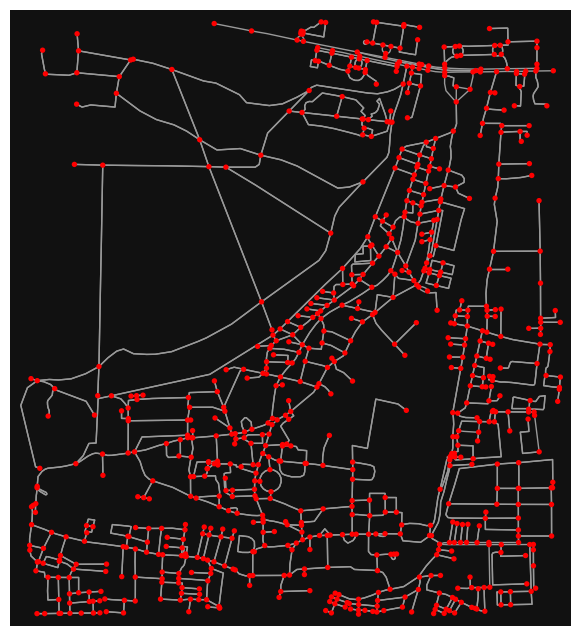

In [13]:
fig, ax = ox.plot_graph(G, node_color="red")

When start and end coordinates are given:

In [3]:
X_orig = input("X for origin:")

In [4]:
Y_orig = input("Y for origin:")

In [5]:
X_des = input("X for destination")

In [6]:
Y_des = input("Y for destination:")

In [18]:
Y_orig, X_orig = 12.990702, 80.234496
Y_des, X_des = 12.991869, 80.230948

In [19]:
orig = ox.distance.nearest_nodes(G, X_orig, Y_orig)
des = ox.distance.nearest_nodes(G, X_des, Y_des)

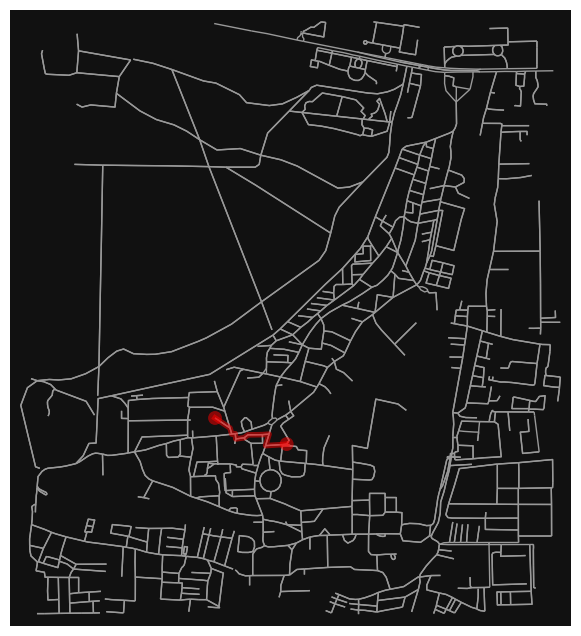

In [20]:
route = ox.shortest_path(G, orig, des, weight="travel_time")
fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [25]:

gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
data = gdf_nodes.loc[route]

In [26]:
waypoints = data['geometry']

In [27]:
waypoints

osmid
330653226    POINT (80.23435 12.99055)
330653296    POINT (80.23417 12.99052)
268790035    POINT (80.23341 12.99048)
268790030    POINT (80.23357 12.99097)
330653290    POINT (80.23327 12.99095)
330653236    POINT (80.23246 12.99082)
330653241    POINT (80.23210 12.99077)
330653246    POINT (80.23207 12.99099)
268790010    POINT (80.23192 12.99097)
330653179    POINT (80.23184 12.99124)
330653184    POINT (80.23118 12.99167)
Name: geometry, dtype: geometry